In [40]:
import math
import pandas as pd
import numpy as np

In [41]:
data = pd.read_csv("/home/acer/Desktop/diffusion.csv")
data= data.drop(["Unnamed: 0"], axis=1)

In [42]:
data.head()

,ASG,DN,DU,EI,NCG,NS,RTC,price_level,p,q
0,1,0,2,5,5,1,2,5,0.904121,0.840618
1,1,1,2,5,5,1,2,4,0.003877,0.983309
2,1,1,2,4,1,1,2,1,0.058030,0.189990
3,0,0,3,2,1,3,3,2,0.441962,0.120782
4,1,0,2,4,1,3,2,2,0.547265,0.079980


In [43]:
data.shape

(1148, 10)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

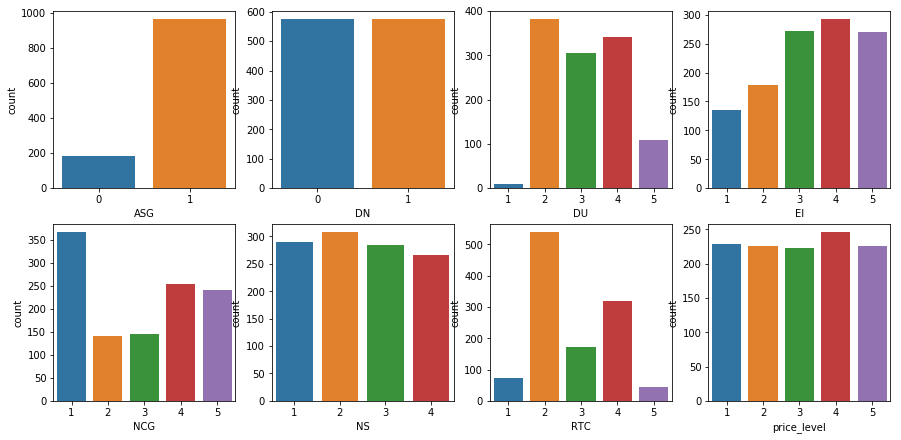

In [45]:
plt.figure(figsize=(15, 15))

for i in range(1, len(data.columns)-1):
    plt.subplot(440+i)
    sns.countplot(data[list(data.columns)[i-1]])

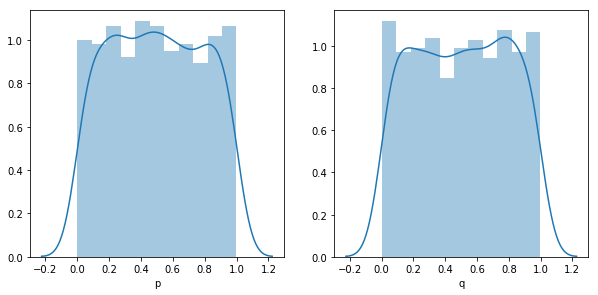

In [46]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(data["p"])

plt.subplot(222)
sns.distplot(data["q"])

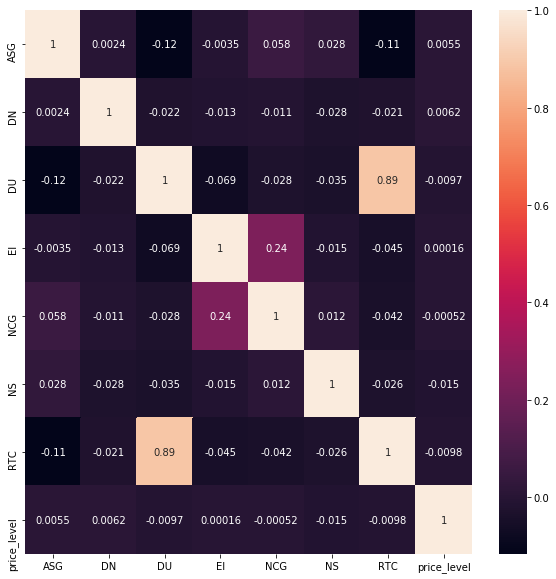

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.iloc[:, :8].corr(),annot=True)

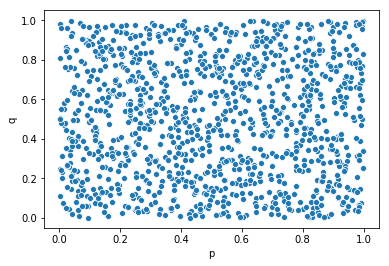

In [48]:
sns.scatterplot(data["p"], data["q"])

In [49]:
for i in range(len(data.columns)-2):
    print(np.unique(data[data.columns[i]]))
    
# first and second columns have 0 so we will not perform log of those columns

[0 1]
[0 1]
[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4]
[1 2 3 4 5]
[1 2 3 4 5]


In [50]:
for i in range(2,len(data.columns)-2):
    data["log"+data.columns[i]] = np.log(data[data.columns[i]]) 

In [51]:
data.head()

,ASG,DN,DU,EI,NCG,NS,RTC,price_level,p,q,logDU,logEI,logNCG,logNS,logRTC,logprice_level
0,1,0,2,5,5,1,2,5,0.904121,0.840618,0.693147,1.609438,1.609438,0.000000,0.693147,1.609438
1,1,1,2,5,5,1,2,4,0.003877,0.983309,0.693147,1.609438,1.609438,0.000000,0.693147,1.386294
2,1,1,2,4,1,1,2,1,0.058030,0.189990,0.693147,1.386294,0.000000,0.000000,0.693147,0.000000
3,0,0,3,2,1,3,3,2,0.441962,0.120782,1.098612,0.693147,0.000000,1.098612,1.098612,0.693147
4,1,0,2,4,1,3,2,2,0.547265,0.079980,0.693147,1.386294,0.000000,1.098612,0.693147,0.693147


In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
train, test= train_test_split(data, train_size=0.75)

/home/acer/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [54]:
y_train = train[["p", "q"]]
y_test = test[["p", "q"]]

test=test.drop(["p", "q"], axis=1)
train=train.drop(["p", "q"], axis=1)

In [55]:
model = LinearRegression(normalize=True)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
rmse_linear = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_linear)

Mean squared error :  0.09158262906449582
Root MSE :  0.302626220054535


In [56]:
model = Ridge(alpha=.05)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
rmse_ridge = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_ridge)

Mean squared error :  0.09155900500010128
Root MSE :  0.30258718578304217


In [57]:
model = Lasso(alpha=.05)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
rmse_lasso = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_lasso)

Mean squared error :  0.08909505641961848
Root MSE :  0.2984879502084104


In [58]:
model = ElasticNet()
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
rmse_elastic = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_elastic)

Mean squared error :  0.08909505641961848
Root MSE :  0.2984879502084104


In [59]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(data)
x_train_poly = poly_reg.fit_transform(train)
poly_reg.fit(x_train_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_train_poly, y_train)

train_predict = regressor_poly2.predict(poly_reg.fit_transform(train))
predict = regressor_poly2.predict(poly_reg.fit_transform(test))

rmse_poly2 = (np.sqrt(mean_squared_error(y_test, predict)))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_poly2)

Mean squared error :  0.10822133590698324
Root MSE :  0.3289701140027514


In [60]:
model = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=10, min_samples_split=2)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
rmse_dt = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_dt)

Mean squared error :  0.09415400038648339
Root MSE :  0.30684523849407114


In [61]:
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                              max_features='auto', min_samples_leaf=10, min_samples_split=7, n_estimators=1200)
history = model.fit(train, y_train)
train_predict = model.predict(train)
predict = model.predict(test)
rmse_rf = math.sqrt(mean_squared_error(y_test, predict))
print("Mean squared error : ",mean_squared_error(y_test, predict))
print("Root MSE : ",rmse_rf)

Mean squared error :  0.09284276624947355
Root MSE :  0.30470110969517905
